## Estudiar la duración de vida de los dos bandos por todas las rondas en el mapa de Dust2


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
db = 'https://raw.githubusercontent.com/razbackup/CSV-EV2/main/dbcs.csv'
data = pd.read_csv(db, engine='python', sep=';', encoding='utf-8')

In [3]:
def findMatchsByMap(data, map):
    matchs = data[data['Map'] == map]
    return matchs

def findTimeAliveByTeamByMatch(match):
    team_CT = match[match['Team'] == "CounterTerrorist"]
    team_T = match[match['Team'] == "Terrorist"]
    
    timeAliveCT = list(team_CT['TimeAlive'].str.replace('.','').astype(float))
    timeAliveT = list(team_T['TimeAlive'].str.replace('.','').astype(float))
        
    return [timeAliveT, timeAliveCT]
    
def findTravelledDistanceByTeamByMatch(match):
    team_CT = match[match['Team'] == "CounterTerrorist"]
    team_T = match[match['Team'] == "Terrorist"]
    
    
    TravelledDistanceCT = list(team_CT['TravelledDistance'].str.replace(',','.').str.replace('.','').astype(float))
    TravelledDistanceT = list(team_T['TravelledDistance'].str.replace(',','.').str.replace('.','').astype(float))
        
    return [TravelledDistanceT, TravelledDistanceCT]

In [4]:

dust2 = 'de_dust2'

# Econtrar el match de dust2
match = findMatchsByMap(data, dust2)
# Time and Distance (X , Y)
dust2_map = [findTimeAliveByTeamByMatch(match), findTravelledDistanceByTeamByMatch(match)]

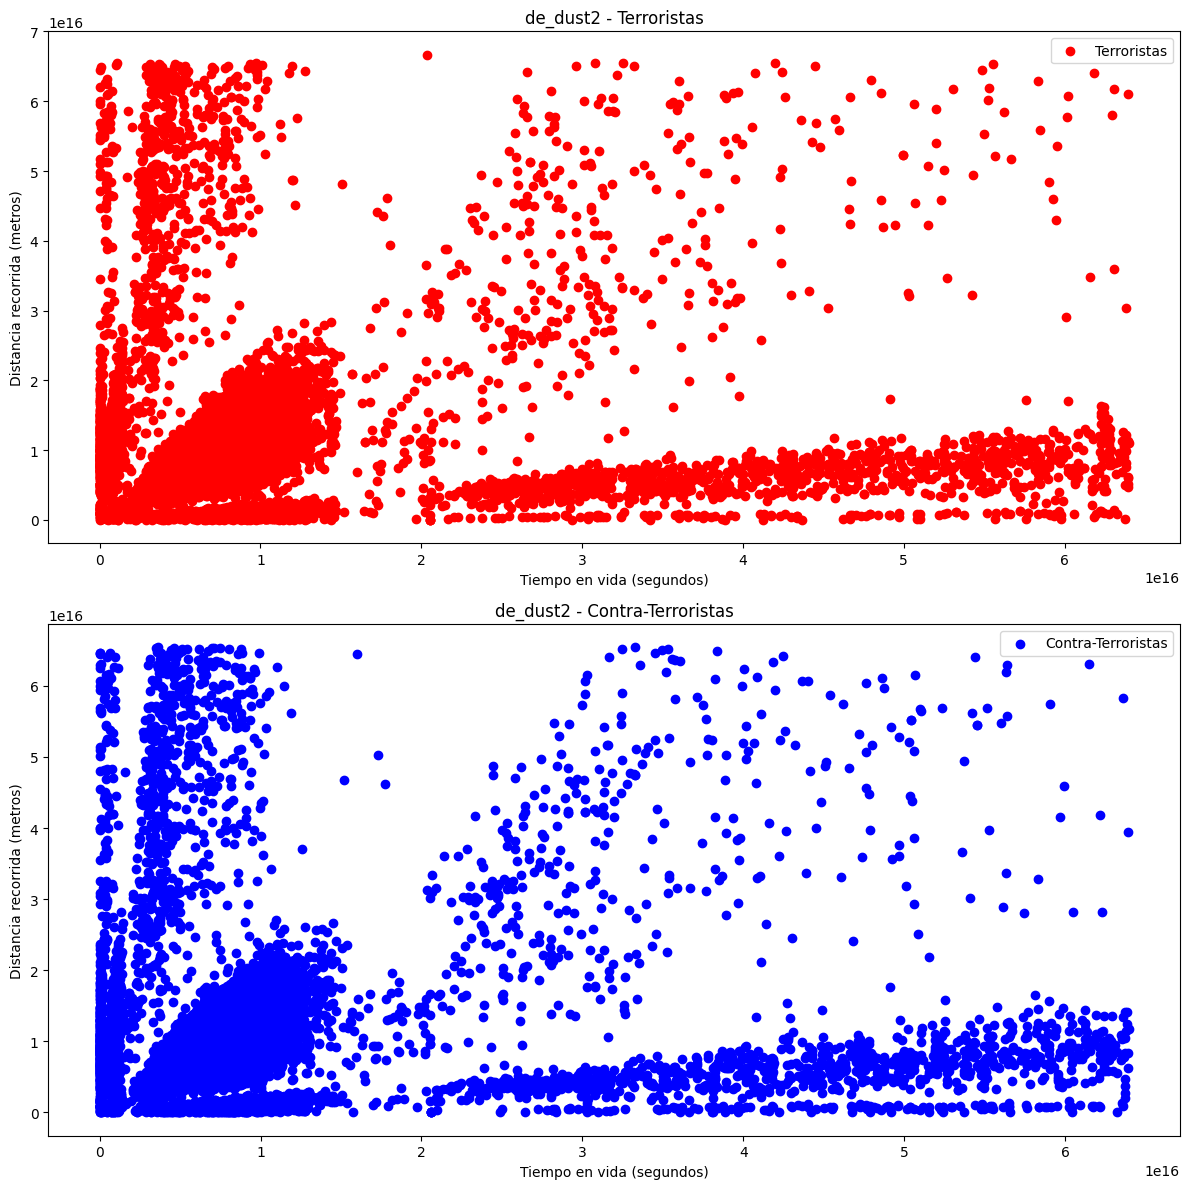

In [5]:
# Graficar el scatter plot para Terroristas y Contra-Terroristas en de_dust2
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Para Terroristas
axs[0].scatter(dust2_map[0][0], dust2_map[1][0], color='red', label='Terroristas')
axs[0].set_title('de_dust2 - Terroristas')
axs[0].set_xlabel('Tiempo en vida (segundos)')
axs[0].set_ylabel('Distancia recorrida (metros)')
axs[0].legend()

# Para Contra-Terroristas
axs[1].scatter(dust2_map[0][1], dust2_map[1][1], color='blue', label='Contra-Terroristas')
axs[1].set_title('de_dust2 - Contra-Terroristas')
axs[1].set_xlabel('Tiempo en vida (segundos)')
axs[1].set_ylabel('Distancia recorrida (metros)')
axs[1].legend()

plt.tight_layout()
plt.show()
 


NameError: name 'sns' is not defined

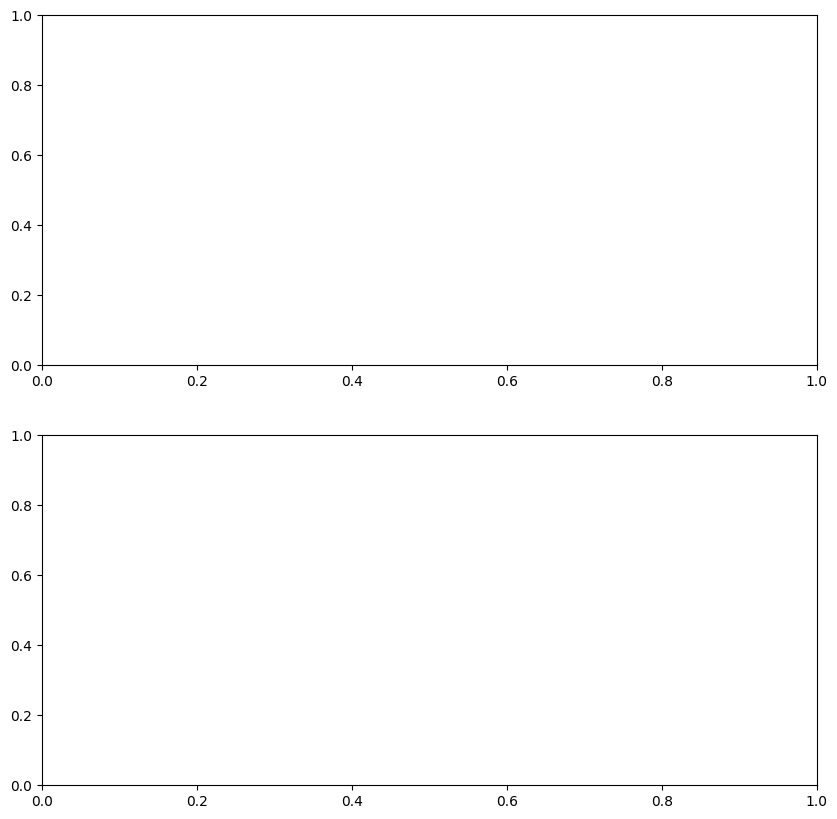

In [6]:
pearson_corr_T, _ = pearsonr(dust2_map[0][0], dust2_map[1][0])
pearson_corr_CT, _ = pearsonr(dust2_map[0][1], dust2_map[1][1])

# Graficar el gráfico de correlación de Pearson
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Para Terroristas
sns.regplot(x=dust2_map[0][0], y=dust2_map[1][0], ax=axs[0], color='red', scatter_kws={'alpha':0.4})
axs[0].set_title(f'de_dust2 - Terroristas\nPearson correlación: {pearson_corr_T:.2f}')
axs[0].set_xlabel('Tiempo en vida (segundos)')
axs[0].set_ylabel('Distancia recorrida (metros)')

# Para Contra-Terroristas
sns.regplot(x=dust2_map[0][1], y=dust2_map[1][1], ax=axs[1], color='blue', scatter_kws={'alpha':0.4})
axs[1].set_title(f'de_dust2 - Contra-Terroristas\nPearson correlación: {pearson_corr_CT:.2f}')
axs[1].set_xlabel('Tiempo en vida (segundos)')
axs[1].set_ylabel('Distancia recorrida (metros)')

plt.tight_layout()
plt.show()